/tmp/ipykernel_3672185/2990534009.py:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brain Area', y='Test Accuracy', data=df_results, palette="Set3")
/tmp/ipykernel_3672185/2990534009.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brain Area', y='Top-5 Accuracy', data=df_results, palette="Set3")


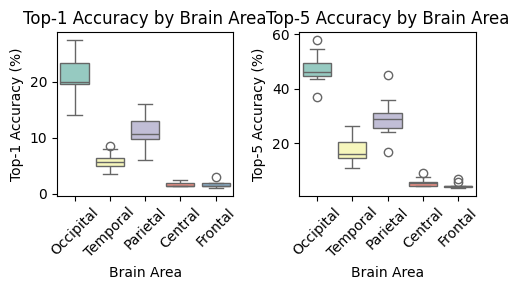

In [5]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/outputs'  # Update with your actual path

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max() * 100,  # Convert to percentage
        'top5_acc': df['top5_acc'].max() * 100  # Convert to percentage
    }
    return max_values

# Regular expression pattern to extract brain area and subject
pattern = re.compile(r'ATM_S_insubject_retrieval_(\w+)_sub-(\d+)\.csv$')

# List to store the results
data_list = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    match = pattern.search(filename)
    if match:
        brain_area, subject = match.groups()
        file_path = os.path.join(directory_path, filename)
        max_values = calculate_max_values(file_path)
        # Append the results to the list
        data_list.append({
            'Brain Area': brain_area,
            'Subject': subject,
            'Test Accuracy': max_values['test_accuracy'],
            'Top-5 Accuracy': max_values['top5_acc']
        })

# Create DataFrame from the list
df_results = pd.DataFrame(data_list)

# Convert 'Subject' to categorical for proper sorting in plots
df_results['Subject'] = pd.Categorical(df_results['Subject'], categories=sorted(df_results['Subject'].unique()), ordered=True)

# Plotting
plt.figure(figsize=(5, 3))

# Top-1 Accuracy
plt.subplot(1, 2, 1)
sns.boxplot(x='Brain Area', y='Test Accuracy', data=df_results, palette="Set3")
plt.title('Top-1 Accuracy by Brain Area')
plt.ylabel('Top-1 Accuracy (%)')
plt.xlabel('Brain Area')
plt.xticks(rotation=45)

# Top-5 Accuracy
plt.subplot(1, 2, 2)
sns.boxplot(x='Brain Area', y='Top-5 Accuracy', data=df_results, palette="Set3")
plt.title('Top-5 Accuracy by Brain Area')
plt.ylabel('Top-5 Accuracy (%)')
plt.xlabel('Brain Area')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

/tmp/ipykernel_747880/6441725.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brain Area', y='Test Accuracy', data=df_results, palette="Set3", order=brain_area_order)


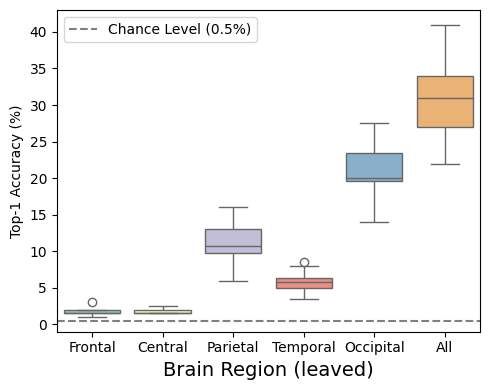

/tmp/ipykernel_747880/6441725.py:64: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brain Area', y='Top-5 Accuracy', data=df_results, palette="Set3", order=brain_area_order)


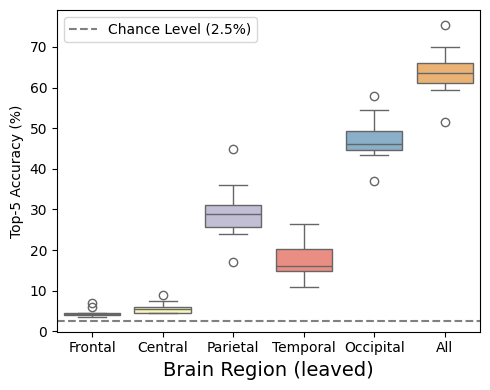

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import re
import seaborn as sns

# Directory path containing the CSV files
directory_path = '/home/ldy/Workspace/BrainAligning_retrieval/conditional_outputs'

# Function to calculate the max values of the metrics
def calculate_max_values(file_path):
    df = pd.read_csv(file_path)
    max_values = {
        'test_accuracy': df['test_accuracy'].max() * 100,  # Convert to percentage
        'top5_acc': df['top5_acc'].max() * 100  # Convert to percentage
    }
    return max_values

# Regular expression pattern to extract brain area, subject, and handle "All" cases
pattern = re.compile(r'ATM_S_insubject_retrieval_(\w+)_sub-(\d+)\.csv$')
pattern_all = re.compile(r'ATM_S_sub-(\d+)\.csv$')

# List to store the results
data_list = []

# Iterate over each file in the directory
for filename in os.listdir(directory_path):
    if match := pattern.search(filename):
        brain_area, subject = match.groups()
    elif match := pattern_all.search(filename):
        subject = match.group(1)
        brain_area = 'All'  # Assign "All" for files representing all brain areas
    else:
        continue
    file_path = os.path.join(directory_path, filename)
    max_values = calculate_max_values(file_path)
    data_list.append({
        'Brain Area': brain_area,
        'Subject': subject,
        'Test Accuracy': max_values['test_accuracy'],
        'Top-5 Accuracy': max_values['top5_acc']
    })

# Create DataFrame from the list
df_results = pd.DataFrame(data_list)

# Define the order of brain areas
brain_area_order = ['Frontal', 'Central', 'Parietal', 'Temporal', 'Occipital', 'All']

# Plotting Top-1 Accuracy
plt.figure(figsize=(5, 4))
sns.boxplot(x='Brain Area', y='Test Accuracy', data=df_results, palette="Set3", order=brain_area_order)
# plt.title('Top-1 Accuracy by Brain Area')
plt.axhline(y=0.5, color='grey', linestyle='--', label='Chance Level (0.5%)')
plt.ylabel('Top-1 Accuracy (%)')
plt.xlabel('Brain Region (leaved)', fontsize=14)
plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

# Plotting Top-5 Accuracy
plt.figure(figsize=(5, 4))
sns.boxplot(x='Brain Area', y='Top-5 Accuracy', data=df_results, palette="Set3", order=brain_area_order)
# plt.title('Top-5 Accuracy by Brain Area')
plt.axhline(y=2.5, color='grey', linestyle='--', label='Chance Level (2.5%)')
plt.ylabel('Top-5 Accuracy (%)')
plt.xlabel('Brain Region (leaved)', fontsize=14)

plt.legend()
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipykernel_2680607/3997772994.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brain Area', y='Test Accuracy', data=df_results, palette="Set3", order=brain_area_order)


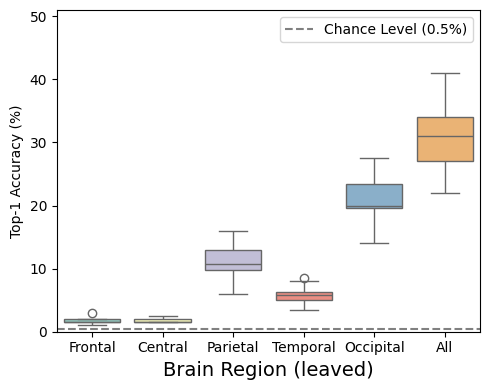

/tmp/ipykernel_2680607/3997772994.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Brain Area', y='Top-5 Accuracy', data=df_results, palette="Set3", order=brain_area_order)


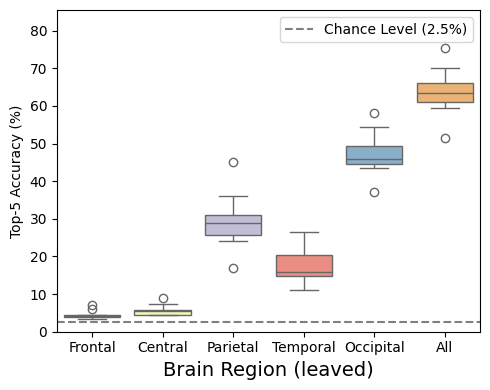

In [4]:
# Plotting Top-1 Accuracy
plt.figure(figsize=(5, 4))
sns.boxplot(x='Brain Area', y='Test Accuracy', data=df_results, palette="Set3", order=brain_area_order)
plt.axhline(y=0.5, color='grey', linestyle='--', label='Chance Level (0.5%)')
plt.ylabel('Top-1 Accuracy (%)')
plt.xlabel('Brain Region (leaved)', fontsize=14)
plt.ylim(0, df_results['Test Accuracy'].max() + 10)  # Adjust the max value as needed
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('Top-1_Accuracy_by_Brain_Area.png', dpi=300)
plt.show()

# Plotting Top-5 Accuracy
plt.figure(figsize=(5, 4))
sns.boxplot(x='Brain Area', y='Top-5 Accuracy', data=df_results, palette="Set3", order=brain_area_order)
plt.axhline(y=2.5, color='grey', linestyle='--', label='Chance Level (2.5%)')
plt.ylabel('Top-5 Accuracy (%)')
plt.xlabel('Brain Region (leaved)', fontsize=14)
plt.ylim(0, df_results['Top-5 Accuracy'].max() + 10)  # Adjust the max value as needed
plt.xticks(rotation=0)
plt.legend()
plt.tight_layout()

# Save the figure with high resolution
plt.savefig('Top-5_Accuracy_by_Brain_Area.png', dpi=300)
plt.show()

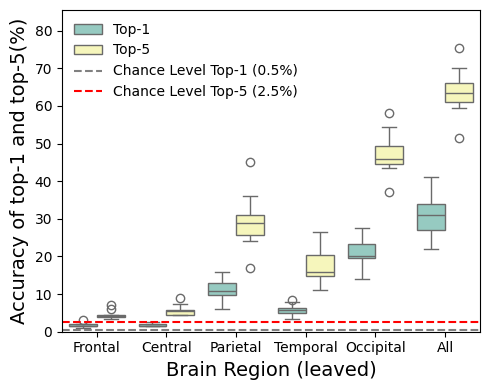

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df_melted = pd.melt(df_results, id_vars=['Brain Area'], value_vars=['Test Accuracy', 'Top-5 Accuracy'],
                    var_name='Accuracy Type', value_name='Accuracy')

df_melted['Accuracy Type'] = df_melted['Accuracy Type'].map({'Test Accuracy': 'Top-1', 'Top-5 Accuracy': 'Top-5'})

plt.figure(figsize=(5, 4))
sns.boxplot(x='Brain Area', y='Accuracy', hue='Accuracy Type', data=df_melted, palette="Set3", order=brain_area_order)

plt.axhline(y=0.5, color='grey', linestyle='--', label='Chance Level Top-1 (0.5%)')
plt.axhline(y=2.5, color='red', linestyle='--', label='Chance Level Top-5 (2.5%)')

plt.ylabel('Accuracy of top-1 and top-5(%)', fontsize=14)
plt.xlabel('Brain Region (leaved)', fontsize=14)
# plt.legend(title='Accuracy Type')
plt.legend(frameon=False)
plt.tight_layout()

plt.savefig('../plots/Accuracy_by_Brain_Area.png', dpi=300)
plt.show()